## **Modelado del comportamiento de una compuerta XOR con una red neuronal**

**1. Importamos las librerías necesarias**

In [1]:
# generales:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

# para las redes neuronales:
from keras import models, layers
from keras.optimizers import SGD
from keras.utils.vis_utils import plot_model

# para plotting:
from matplotlib import cm
from matplotlib import pyplot as plt
%matplotlib inline

f"tensorflow version: {tf.__version__}"

'tensorflow version: 2.9.2'

**2. Creamos los tensores para los datos de entrada y los _targets_**

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]], 'float32')
y = np.array([[0],[1],[1],[0]], 'float32')
X.shape, y.shape

((4, 2), (4, 1))

**3. Calculamos las dimensiones requeridas para el perceptrón**

In [3]:
def getNetParams(x, t):
  if x.shape[0] != t.shape[0]:
    return 0, 0, 0
  features   = x.shape[1]
  categories = t.shape[1]
  samples    = x.shape[0]
  return features, categories, samples

In [4]:
features, categories, samples = getNetParams(X, y)
features, categories, samples

(2, 1, 4)

## **Modelo de la red**

In [7]:
def MLP():
    # determinar el numero de neuronas en la capa oculta
    hiddenNeurons = 2
    # crear el modelo
    model = models.Sequential(name='XOR')
    model.add(
      layers.Dense(
        name="hidden_layer",
        units=hiddenNeurons,
        activation="sigmoid",
        input_dim=features
      )
    )
    model.add(
      layers.Dense(
        name="output_layer",
        units=categories,
        activation="sigmoid"
      )
    )
    # compilar el modelo
    model.compile(
      loss='mean_squared_error', # función de pérdida
      optimizer=SGD(learning_rate=0.1), # optimizador
      metrics=["accuracy"]
    ) # métricas con las que se evaluará el modelo
    return model

**4. Instanciamos y entrenamos nuestro modelo**

In [8]:
mlp = MLP()
mlp.summary()

Model: "XOR"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 2)                 6         
                                                                 
 output_layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [15]:
metrics = mlp.fit(X, y, epochs=20000, verbose=0)

**5. Predecimos valores con nuestro modelo entrenado**

In [16]:
mlp.predict(X)

1/1 [==============================] - 0s 17ms/step


array([[0.04465777],
       [0.9569445 ],
       [0.95062953],
       [0.03965133]], dtype=float32)

**6. Observamos los valores de los pesos**

In [17]:
W0 = mlp.layers[0].get_weights()[0]
b0 = mlp.layers[0].get_weights()[1]
W1 = mlp.layers[1].get_weights()[0]
b1 = mlp.layers[1].get_weights()[1]
W0, b0, W1, b1

(array([[-5.807942 , -4.948359 ],
        [ 5.840867 ,  4.7109447]], dtype=float32),
 array([ 3.023379 , -2.5521202], dtype=float32),
 array([[-7.355926 ],
        [ 7.8917503]], dtype=float32),
 array([3.3812623], dtype=float32))

### **Interpretando resultados**

**7. Observamos la función de pérdida de nuestro modelo durante el entrenamiento**

'min val: 0.0019645830616354942, last val: 0.0019645830616354942'

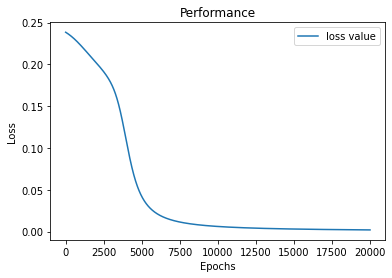

In [18]:
loss = metrics.history['loss']

ax = pd.DataFrame({'loss value': loss}).plot(title='Performance')
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.plot()

f"min val: {min(loss)}, last val: {loss[-1]}"

**8. Observamos en un espacio tridimensional los datos de entrada y el hyperplano de separación**

In [19]:
def sigmoid(X):
   return 1/(1 + np.exp(-X)) 

In [20]:
t = np.arange(-5, 6, 1, dtype=int)
x1, x2 = np.meshgrid(t, t)

z1 = sigmoid(W0[0, 0]*x1 + W0[1, 0]*x2 + b0[0])
z2 = sigmoid(W0[0, 1]*x1 + W0[1, 1]*x2 + b0[1])
z  = sigmoid(W1[0]*z1 + W1[1]*z2 + b1[0])

3888/3888 [==============================] - 5s 1ms/step


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


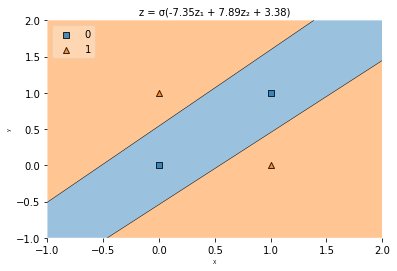

In [33]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=X, y=y.reshape((-1,)).astype(int), clf=mlp, legend=2)
plt.xlabel("X", size=5)
plt.ylabel("y", size=5)
plt.title("z = σ(-7.35z₁ + 7.89z₂ + 3.38)", size=10)
plt.show()

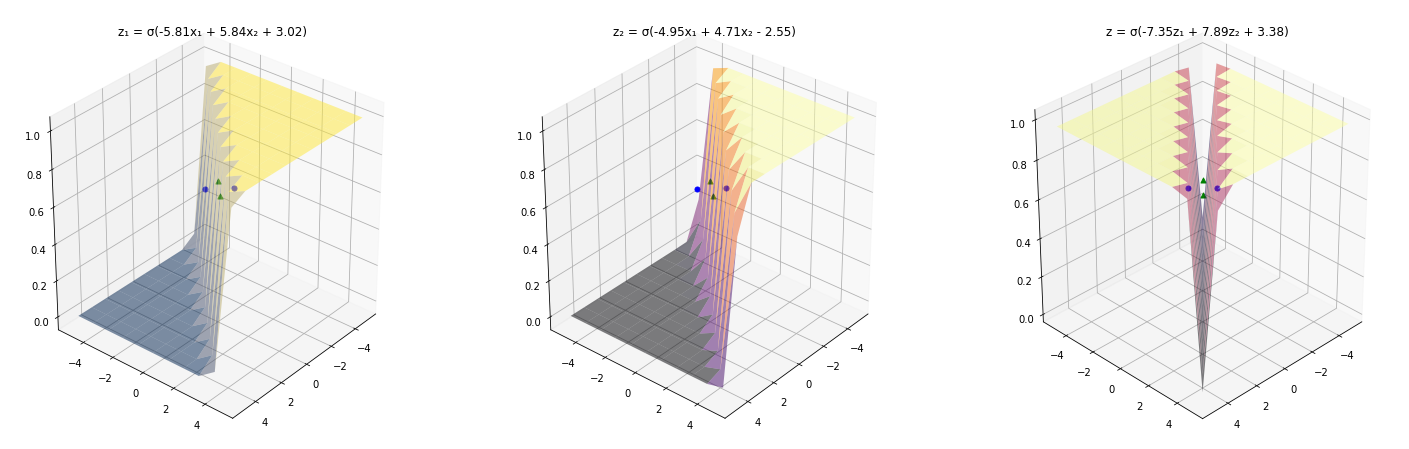

In [41]:
def plotBoundaries(colorMap):
  fig = plt.figure(figsize=(25, 8))

  ax1 = plt.subplot(131, projection='3d')
  ax2 = plt.subplot(132, projection='3d')
  ax3 = plt.subplot(133, projection='3d')  

  ax1.set_title("z₁ = σ(-5.81x₁ + 5.84x₂ + 3.02)")
  ax2.set_title("z₂ = σ(-4.95x₁ + 4.71x₂ - 2.55)")
  ax3.set_title("z = σ(-7.35z₁ + 7.89z₂ + 3.38)")

  ax1.view_init(30, 40)
  ax1.plot_surface(x1, x2, z1, alpha=0.50, cmap=colorMap)
  ax2.view_init(30, 40)
  ax2.plot_surface(x1, x2, z2, alpha=0.50, cmap=cm.inferno)
  ax3.view_init(30, 45)
  ax3.plot_surface(x1, x2, z, alpha=0.50, cmap=cm.inferno)

  for u, v in zip(X.tolist(), y.tolist()):
    ax1.scatter(u[0], u[1], [0.70], s=25.0, c="green" if v[0] == 0 else "blue", marker="^" if v[0] == 0 else "o")
    ax2.scatter(u[0], u[1], [0.70], s=25.0, c="green" if v[0] == 0 else "blue", marker="^" if v[0] == 0 else "o")
    ax3.scatter(u[0], u[1], [0.70], s=25.0, c="green" if v[0] == 0 else "blue", marker="^" if v[0] == 0 else "o") 
  plt.show()

plotBoundaries(colorMap=cm.cividis)